In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv('salary_data_cleaned.csv')

In [9]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,Company_txt,Job_State,age_of_company,python_yn,sql_yn,excel_yn,spark_yn,aws_yn,job_simp
0,Data Scientist,$60K - $140K (Employer est.),"We are looking for junior, mid-level or senior...",-1.0,Tech brothers infoservices,Remote,Unknown,-1,Company - Public,unknown,...,100.0,Tech brothers infoservices,Remote,-1,1,1,1,0,0,data scientist
1,Data Scientist,$60K - $140K (Employer est.),Description: Would you like to join a rapidly ...,4.3,"ClassLink, Inc.\n4.3",Remote,Unknown,-1,Company - Private,Internet & Web Services,...,100.0,"ClassLink, Inc.\n",Remote,-1,0,0,0,0,0,data scientist
2,Data Scientist,$60K - $140K (Employer est.),"Do you have a passion for data science, machin...",4.3,Microsoft\n4.3,"Cambridge, MA",10000+ Employees,1975,Company - Public,Computer Hardware Development,...,100.0,Microsoft\n,MA,48,0,0,0,0,1,data scientist
3,Data Scientist,$60K - $140K (Employer est.),Roles & Responsibilities: Provides support of ...,-1.0,Ai Vantage,Remote,Unknown,-1,Company - Public,unknown,...,100.0,Ai Vantage,Remote,-1,0,0,0,0,0,data scientist
4,Data Scientist,$60K - $140K (Employer est.),Who May Apply\n\nJob Opening: 46673. Job Posti...,4.1,Federal Bureau of Investigation\n4.1,"Washington, DC",10000+ Employees,1908,Government,National Agencies,...,100.0,Federal Bureau of Investigation\n,DC,115,0,0,0,0,0,data scientist


In [10]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'Job_State', 'age_of_company', 'python_yn',
       'sql_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'job_simp'],
      dtype='object')

In [11]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [12]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [13]:
df.job_simp.value_counts()

job_simp
data scientist    478
na                 12
analyst             8
data engineer       2
Name: count, dtype: int64

In [14]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

seniority
na        348
senior    141
jr         11
Name: count, dtype: int64

In [27]:
# Revised dictionary with both full names and uppercase abbreviations
state_abbreviations = {
    'california': 'CA',
    'texas': 'TX',
    'alabama': 'AL',
    'illinois': 'IL',
    'new york state': 'NY',
    'virginia': 'VA',
    'massachusetts': 'MA',
    'maine': 'ME',
    'maryland': 'MD',
    'united states': 'USA',
}

# Apply lambda function to db
df['job_state'] = df['job_state'].apply(lambda x: state_abbreviations.get(x.strip().lower(), x.strip()))

# Count the values again
df.job_state.value_counts()


job_state
CA        108
Remote     98
TX         48
NY         39
VA         23
IL         22
USA        17
NJ         15
MA         14
FL         12
NC         11
WA         10
MD          9
CO          9
MO          7
MN          7
DC          7
GA          7
MI          6
CT          5
AZ          4
IN          4
AL          3
OH          3
LA          2
OR          2
DE          1
KY          1
ME          1
PA          1
HI          1
WI          1
TN          1
UT          1
Name: count, dtype: int64

In [28]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       544
1       778
2      1926
3      1474
4       655
       ... 
495    1274
496     830
497     756
498    1588
499     676
Name: desc_len, Length: 500, dtype: int64

In [32]:
df['Company_txt'] = df.Company_txt.apply(lambda x: x.replace('\n', ''))

In [33]:
df['Company_txt']

0                Tech brothers infoservices
1                           ClassLink, Inc.
2                                 Microsoft
3                                Ai Vantage
4           Federal Bureau of Investigation
                       ...                 
495                             Freddie Mac
496                                Hatch IT
497                                 Verizon
498    Teachers College Columbia University
499                        Restaurant Depot
Name: Company_txt, Length: 500, dtype: object

In [34]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,age_of_company,python_yn,sql_yn,excel_yn,spark_yn,aws_yn,desc_len
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.330800,1590.388000,110.060000,183.380000,146.720000,39.762000,0.110000,0.090000,0.112000,0.026000,0.054000,1276.774000
std,1.632943,782.937384,31.721111,81.573919,53.963002,51.056389,0.313203,0.286468,0.315682,0.159295,0.226244,1135.950018
min,-1.000000,-1.000000,50.000000,80.000000,65.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000
25%,3.500000,1884.500000,92.000000,130.000000,112.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,707.000000
50%,3.900000,1977.500000,112.000000,143.000000,126.500000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,916.500000
75%,4.100000,2006.000000,140.000000,218.000000,165.000000,53.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1310.500000
max,5.000000,2022.000000,153.000000,332.000000,242.500000,333.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7972.000000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'Job_State', 'age_of_company', 'python_yn',
       'sql_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_state', 'desc_len'],
      dtype='object')

<Axes: >

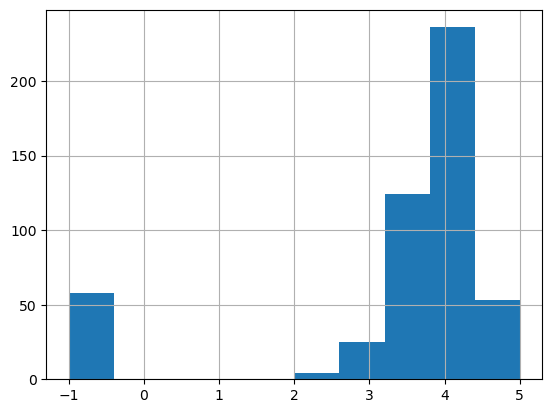

In [37]:
df.Rating.hist()

<Axes: >

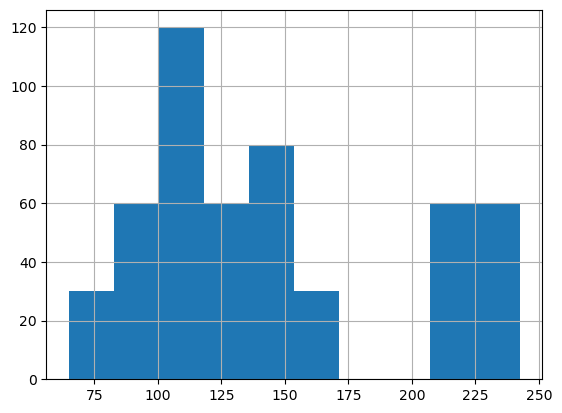

In [40]:
df.avg_salary.hist()

<Axes: >

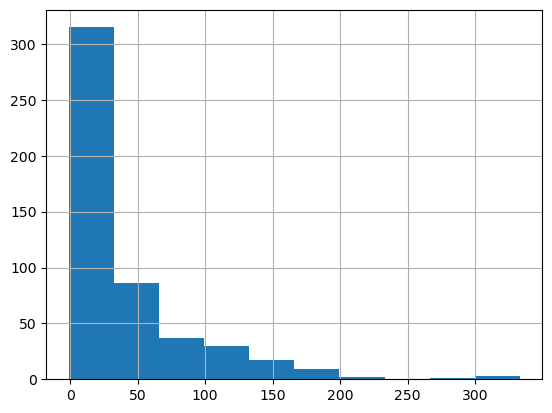

In [43]:
df.age_of_company.hist()

<Axes: >

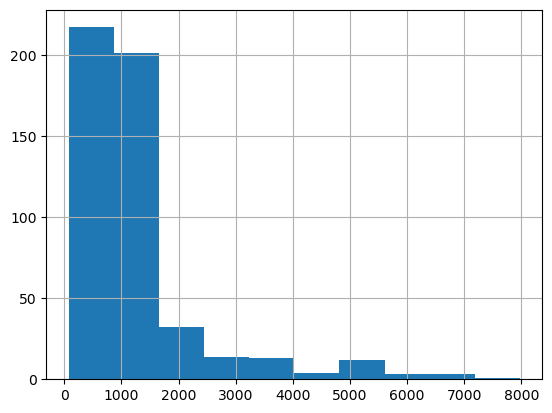

In [44]:
df.desc_len.hist()

<Axes: >

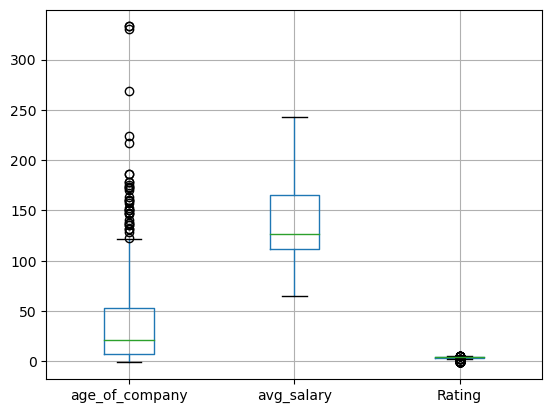

In [45]:
df.boxplot(column = ['age_of_company','avg_salary','Rating'])

<Axes: >

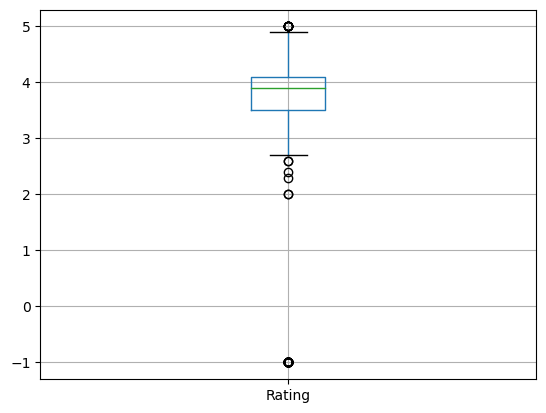

In [46]:
df.boxplot(column = 'Rating')

In [48]:
df[['age_of_company','avg_salary','Rating','desc_len']].corr()

,age_of_company,avg_salary,Rating,desc_len
age_of_company,1.000000,0.025844,0.258850,-0.008694
avg_salary,0.025844,1.000000,0.095370,0.053233
Rating,0.258850,0.095370,1.000000,0.103084
desc_len,-0.008694,0.053233,0.103084,1.000000


<Axes: >

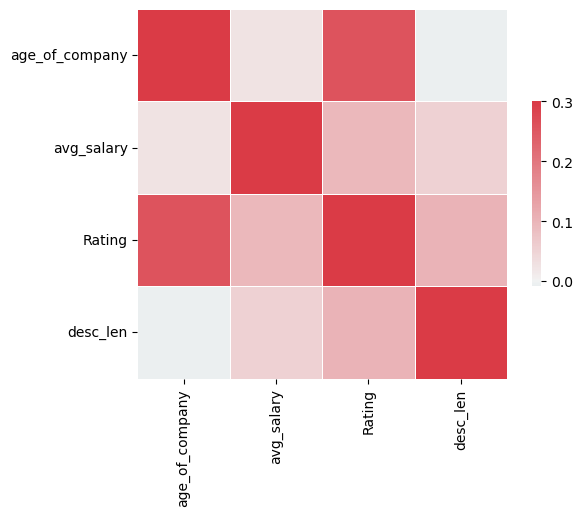

In [50]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age_of_company','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'Company_txt', 'Job_State', 'age_of_company', 'python_yn',
       'sql_yn', 'excel_yn', 'spark_yn', 'aws_yn', 'job_simp', 'seniority',
       'job_state', 'desc_len'],
      dtype='object')

In [54]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_txt', 'job_state', 'python_yn', 'sql_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 165


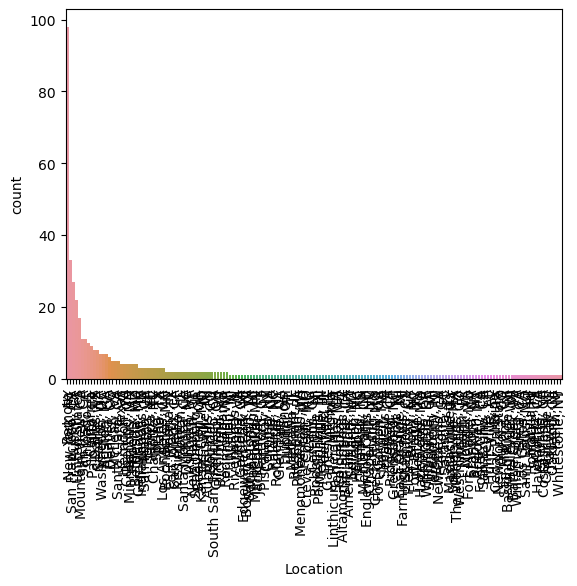

graph for Size: total = 9


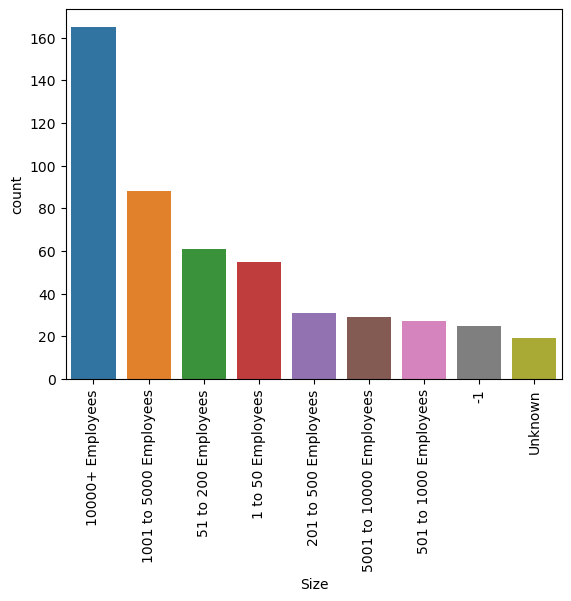

graph for Type of ownership: total = 12


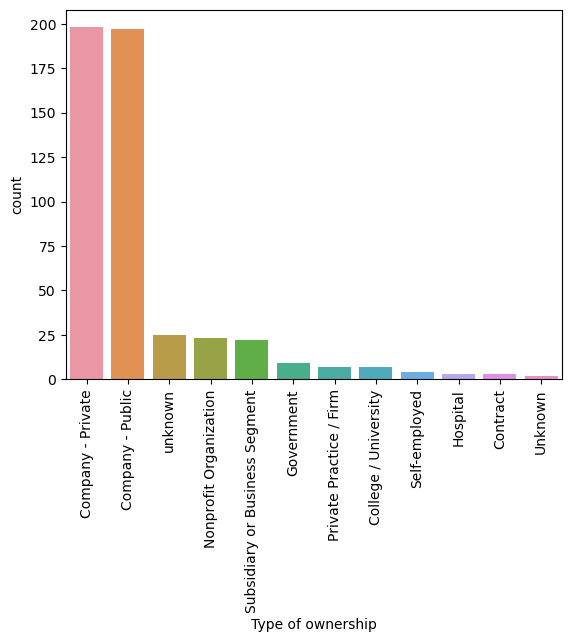

graph for Industry: total = 59


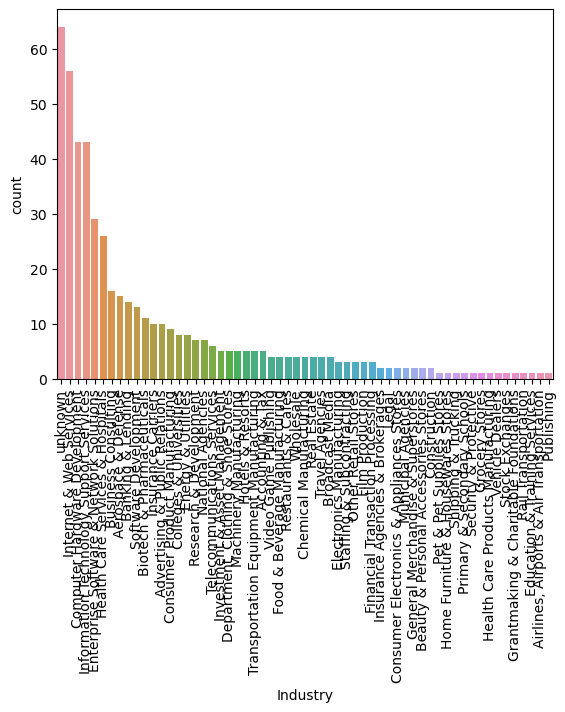

graph for Sector: total = 23


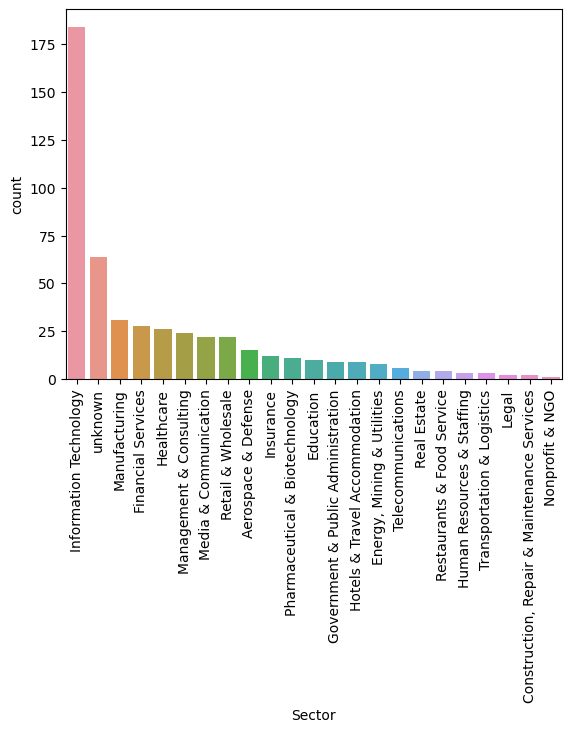

graph for Revenue: total = 11


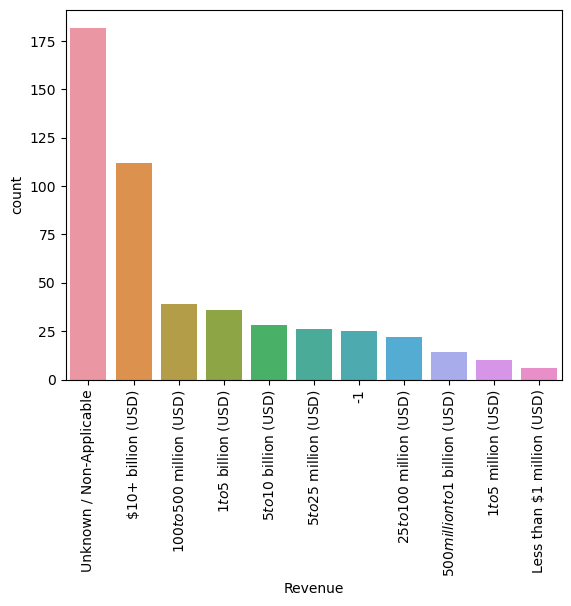

graph for Company_txt: total = 416


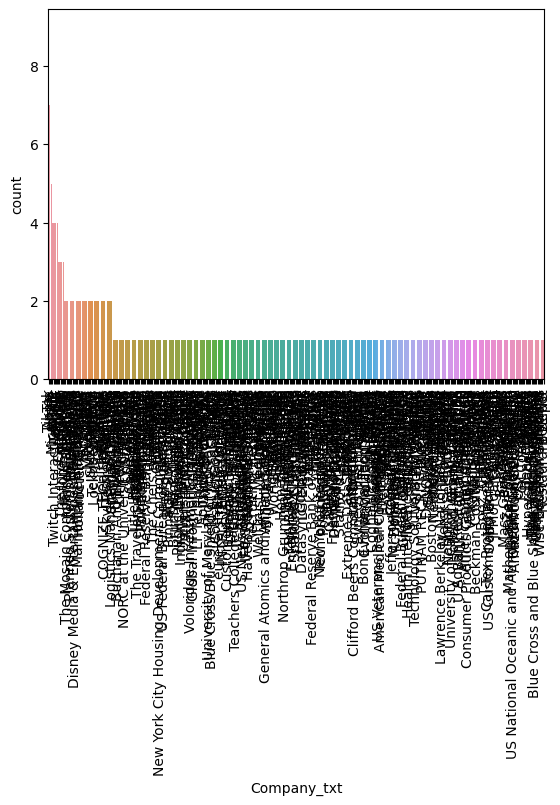

graph for job_state: total = 34


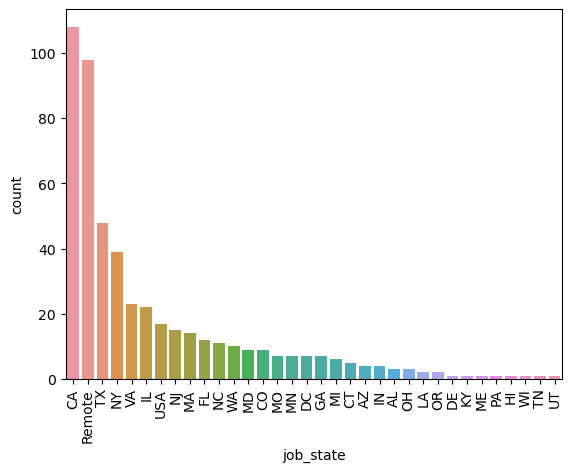

graph for python_yn: total = 2


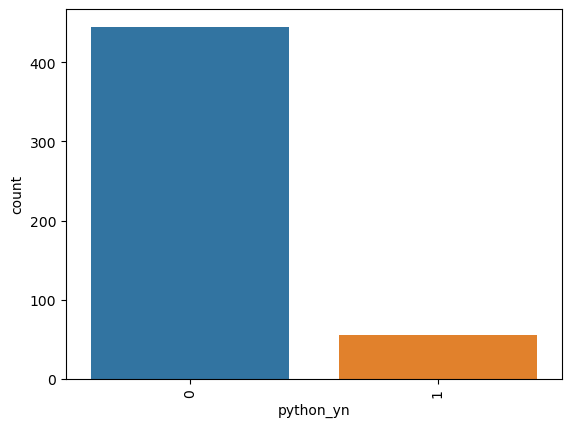

graph for sql_yn: total = 2


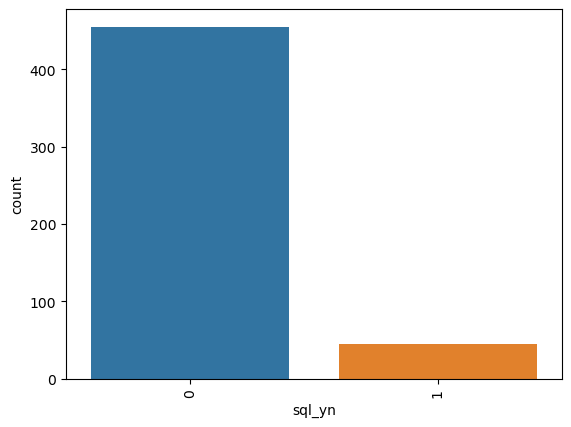

graph for spark_yn: total = 2


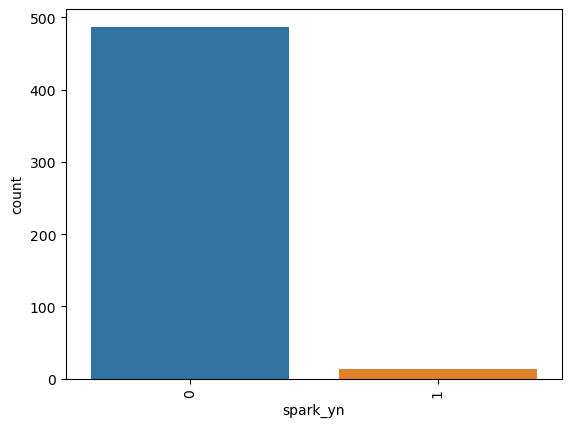

graph for aws_yn: total = 2


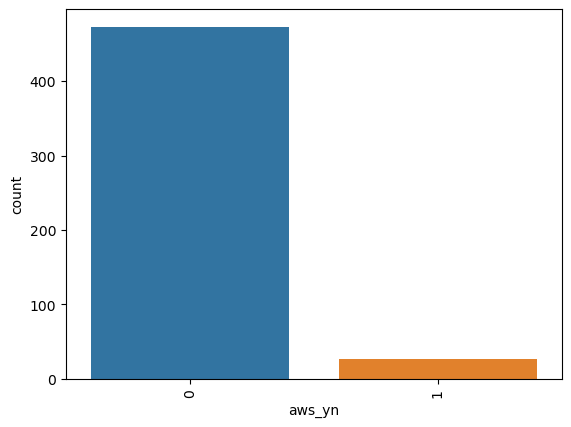

graph for excel_yn: total = 2


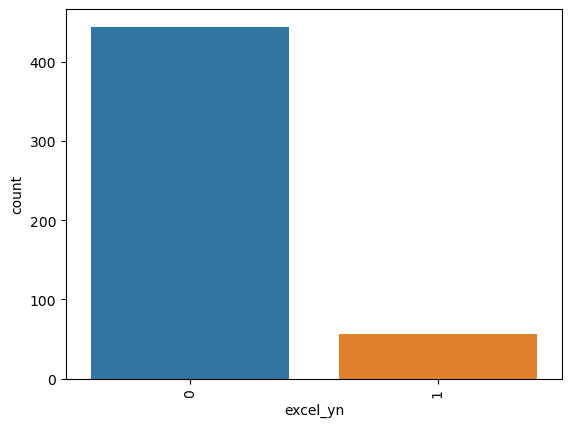

graph for job_simp: total = 4


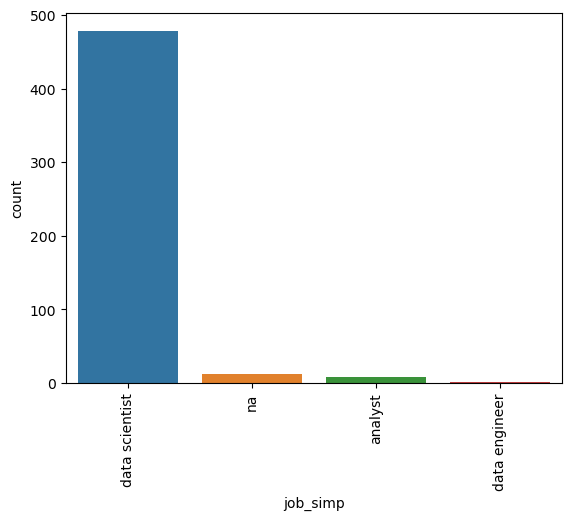

graph for seniority: total = 3


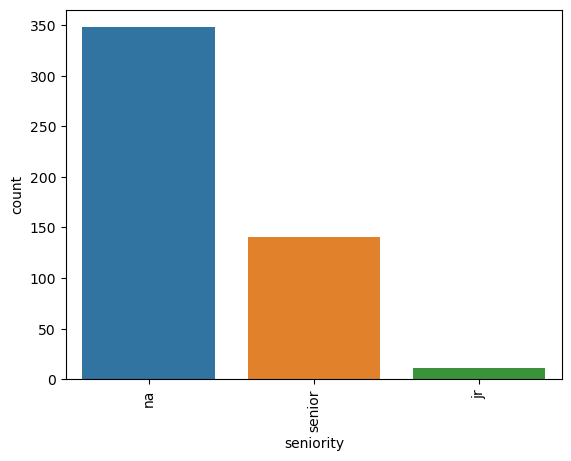

In [55]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


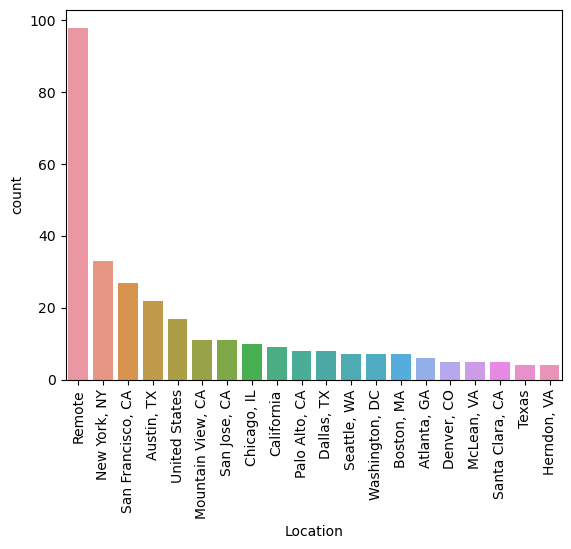

graph for Company_txt: total = 20


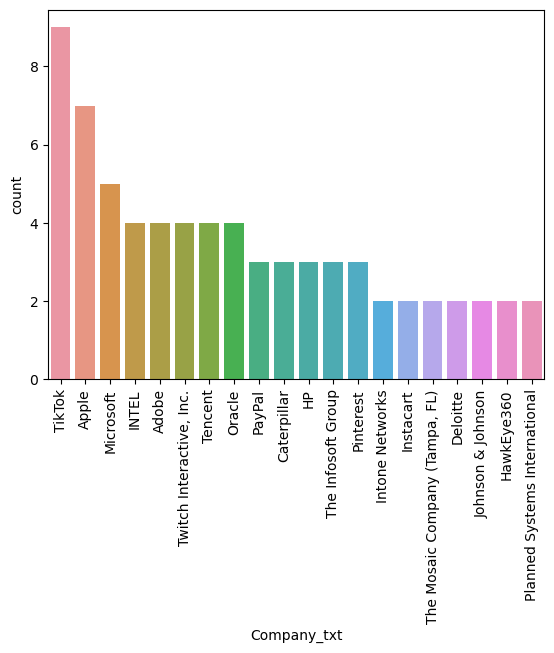

In [58]:
for i in df_cat[['Location','Company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [59]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,145.000000
data engineer,157.000000
data scientist,146.890167
na,139.375000


In [60]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.250000
               na         167.916667
data engineer  na         165.000000
               senior     149.000000
data scientist jr         147.500000
               na         141.993921
               senior     158.357143
na             na         139.375000

In [61]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist  149.000000
WA        data scientist  158.850000
VA        data scientist  148.333333
          analyst         186.750000
UT        data scientist  115.500000
USA       data scientist  151.500000
TX        na               87.500000
          data scientist  138.968085
TN        data scientist  115.500000
Remote    data scientist  133.853261
          analyst          76.250000
          data engineer   149.000000
          na              186.500000
PA        data scientist   87.500000
OR        data scientist  179.000000
OH        na               65.000000
          data scientist  184.500000
NY        na              195.750000
          data scientist  163.932432
NJ        data scientist  131.733333
NC        data scientist  136.900000
          analyst         149.000000
MO        data scientist  160.642857
MN        data scientist  155.500000
          analyst         242.500000
MI        na               65.000000
          data scientist  153.900000
ME        data scientist   87.500000
MD        data scientist  156.777778
MA        data scientist  135.000000
          data engineer   165.000000
LA        data scientist  195.750000
KY        data scientist  118.000000
IN        data scientist  179.375000
IL        data scientist  168.500000
HI        data scientist  224.500000
GA        data scientist  142.285714
FL        data scientist  149.500000
          analyst         118.000000
DE        data scientist   65.000000
DC        data scientist  157.071429
CT        data scientist  119.200000
CO        data scientist  155.055556
CA        na              143.500000
          data scientist  149.095238
          analyst         124.500000
AZ        data scientist  161.000000
AL        na              108.500000
          data scientist  149.000000

In [67]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [68]:
60

60

In [69]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        data scientist           1
WA        data scientist          10
VA        data scientist          21
          analyst                  2
UT        data scientist           1
USA       data scientist          17
TX        na                       1
          data scientist          47
TN        data scientist           1
Remote    data scientist          92
          analyst                  2
          data engineer            1
          na                       3
PA        data scientist           1
OR        data scientist           2
OH        na                       1
          data scientist           2
NY        na                       2
          data scientist          37
NJ        data scientist          15
NC        data scientist          10
          analyst                  1
MO        data scientist           7
MN        data scientist           6
          analyst                  1
MI        na                       1
          data scientist           5
ME        data scientist           1
MD        data scientist           9
MA        data scientist          13
          data engineer            1
LA        data scientist           2
KY        data scientist           1
IN        data scientist           4
IL        data scientist          22
HI        data scientist           1
GA        data scientist           7
FL        data scientist          11
          analyst                  1
DE        data scientist           1
DC        data scientist           7
CT        data scientist           5
CO        data scientist           9
CA        na                       2
          data scientist         105
          analyst                  1
AZ        data scientist           4
AL        na                       2
          data scientist           1

In [70]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
HI,224.500000
LA,195.750000
OH,184.500000
IN,179.375000
OR,179.000000
IL,168.500000
NY,163.932432
AZ,161.000000
MO,160.642857


In [71]:
# rating, industry, sector, revenue, python, sql, spark, aws, excel, desc_len, Type of onwership

In [75]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_yn', 'sql_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [76]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.7    242.500000
 4.6    206.300000
 3.5    175.074074
 3.8    160.222222
 4.8    159.333333
 3.6    158.125000
 3.4    152.891304
 4.2    151.950000
 2.8    150.500000
 3.9    149.637255
 4.0    147.921569
 3.0    146.700000
 4.9    146.642857
 4.3    143.603448
 2.6    143.500000
 3.3    142.187500
 3.7    141.400000
 4.5    140.600000
 4.1    140.118421
 2.9    139.312500
 5.0    132.500000
-1.0    131.741379
 4.7    130.750000
 3.1    125.785714
 4.4    122.863636
 2.4    118.000000
 2.3    112.000000
 3.2    110.666667
 2.0     76.250000
Industry
                                          avg_salary
Industry                                            
Shipping & Trucking                       242.500000
Primary & Secondary Schools               242.500000
Health Care Products Manufacturing        224.500000
Home Furniture & Housewares Stores        222.000000
Other Retail Stores                       209.833333
Municipal Agencies      

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [77]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $5 billion (USD),36.0,NaN
$1 to $5 million (USD),7.0,3.0
$10+ billion (USD),100.0,12.0
$100 to $500 million (USD),37.0,2.0
$25 to $100 million (USD),21.0,1.0
$5 to $10 billion (USD),23.0,5.0
$5 to $25 million (USD),24.0,2.0
$500 million to $1 billion (USD),13.0,1.0
-1,21.0,4.0


In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cheryl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cheryl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


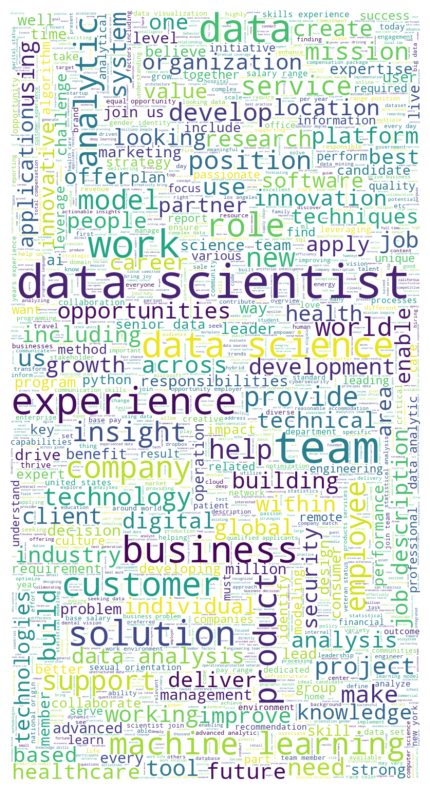

In [89]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [90]:
df.to_csv('eda_data.csv')